# IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp
mp.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv(r'C:\Users\PC\project\Godavari.csv')
data

,Date,Discharge,flood runoff,daily runoff,weekly runoff,Flood
0,1-Jan-98,3244.0,0.00,0.91,NaN,0.0
1,2-Jan-98,1591.0,0.00,0.45,NaN,0.0
2,3-Jan-98,1973.0,0.00,0.55,NaN,0.0
3,4-Jan-98,1973.0,0.00,0.55,NaN,0.0
4,5-Jan-98,2011.0,0.00,0.56,NaN,0.0
...,...,...,...,...,...,...
7665,27-Dec-18,10748.0,0.00,3.01,29.32,0.0
7666,28-Dec-18,12275.0,0.00,3.43,27.19,0.0
7667,29-Dec-18,11629.0,0.00,3.25,25.30,0.0
7668,30-Dec-18,14021.0,0.00,3.92,24.70,0.0


In [3]:
#Lets drop the Date
data.drop('Date',axis='columns',inplace=True)

In [4]:
data

,Discharge,flood runoff,daily runoff,weekly runoff,Flood
0,3244.0,0.00,0.91,NaN,0.0
1,1591.0,0.00,0.45,NaN,0.0
2,1973.0,0.00,0.55,NaN,0.0
3,1973.0,0.00,0.55,NaN,0.0
4,2011.0,0.00,0.56,NaN,0.0
...,...,...,...,...,...
7665,10748.0,0.00,3.01,29.32,0.0
7666,12275.0,0.00,3.43,27.19,0.0
7667,11629.0,0.00,3.25,25.30,0.0
7668,14021.0,0.00,3.92,24.70,0.0


# PERFORM EXPLORATORY DATA ANALYSIS

In [5]:
#Checking the null values

In [6]:
data.isnull().any().any()

True

In [7]:
data.isna().sum()

Discharge        25
flood runoff      0
daily runoff      0
weekly runoff     6
Flood             0
dtype: int64

In [8]:
data['Discharge'].fillna(data['Discharge'].mode()[0],inplace=True)
data['weekly runoff'].fillna(data['weekly runoff'].mode()[0],inplace=True)

In [9]:
data.isnull().any().any()

False

In [10]:
data.isna().sum()

Discharge        0
flood runoff     0
daily runoff     0
weekly runoff    0
Flood            0
dtype: int64

In [11]:
data

,Discharge,flood runoff,daily runoff,weekly runoff,Flood
0,3244.0,0.00,0.91,0.00,0.0
1,1591.0,0.00,0.45,0.00,0.0
2,1973.0,0.00,0.55,0.00,0.0
3,1973.0,0.00,0.55,0.00,0.0
4,2011.0,0.00,0.56,0.00,0.0
...,...,...,...,...,...
7665,10748.0,0.00,3.01,29.32,0.0
7666,12275.0,0.00,3.43,27.19,0.0
7667,11629.0,0.00,3.25,25.30,0.0
7668,14021.0,0.00,3.92,24.70,0.0


In [12]:
#Check the dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Discharge      7670 non-null   float64
 1   flood runoff   7670 non-null   float64
 2   daily runoff   7670 non-null   float64
 3   weekly runoff  7670 non-null   float64
 4   Flood          7670 non-null   float64
dtypes: float64(5)
memory usage: 299.7 KB


In [13]:
#Statistical summary of the dataframe
data.describe()

,Discharge,flood runoff,daily runoff,weekly runoff,Flood
count,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000
mean,3814.786441,0.101752,1.067362,7.458305,0.029061
std,3384.306312,1.376689,0.946885,6.260786,0.393687
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1577.000000,0.000000,0.440000,3.282500,0.000000
50%,2801.500000,0.000000,0.780000,5.520000,0.000000
75%,4901.750000,0.000000,1.370000,9.580000,0.000000
max,30154.000000,35.000000,8.440000,48.000000,10.000000


# PERFORM DATA VISUALIZATION

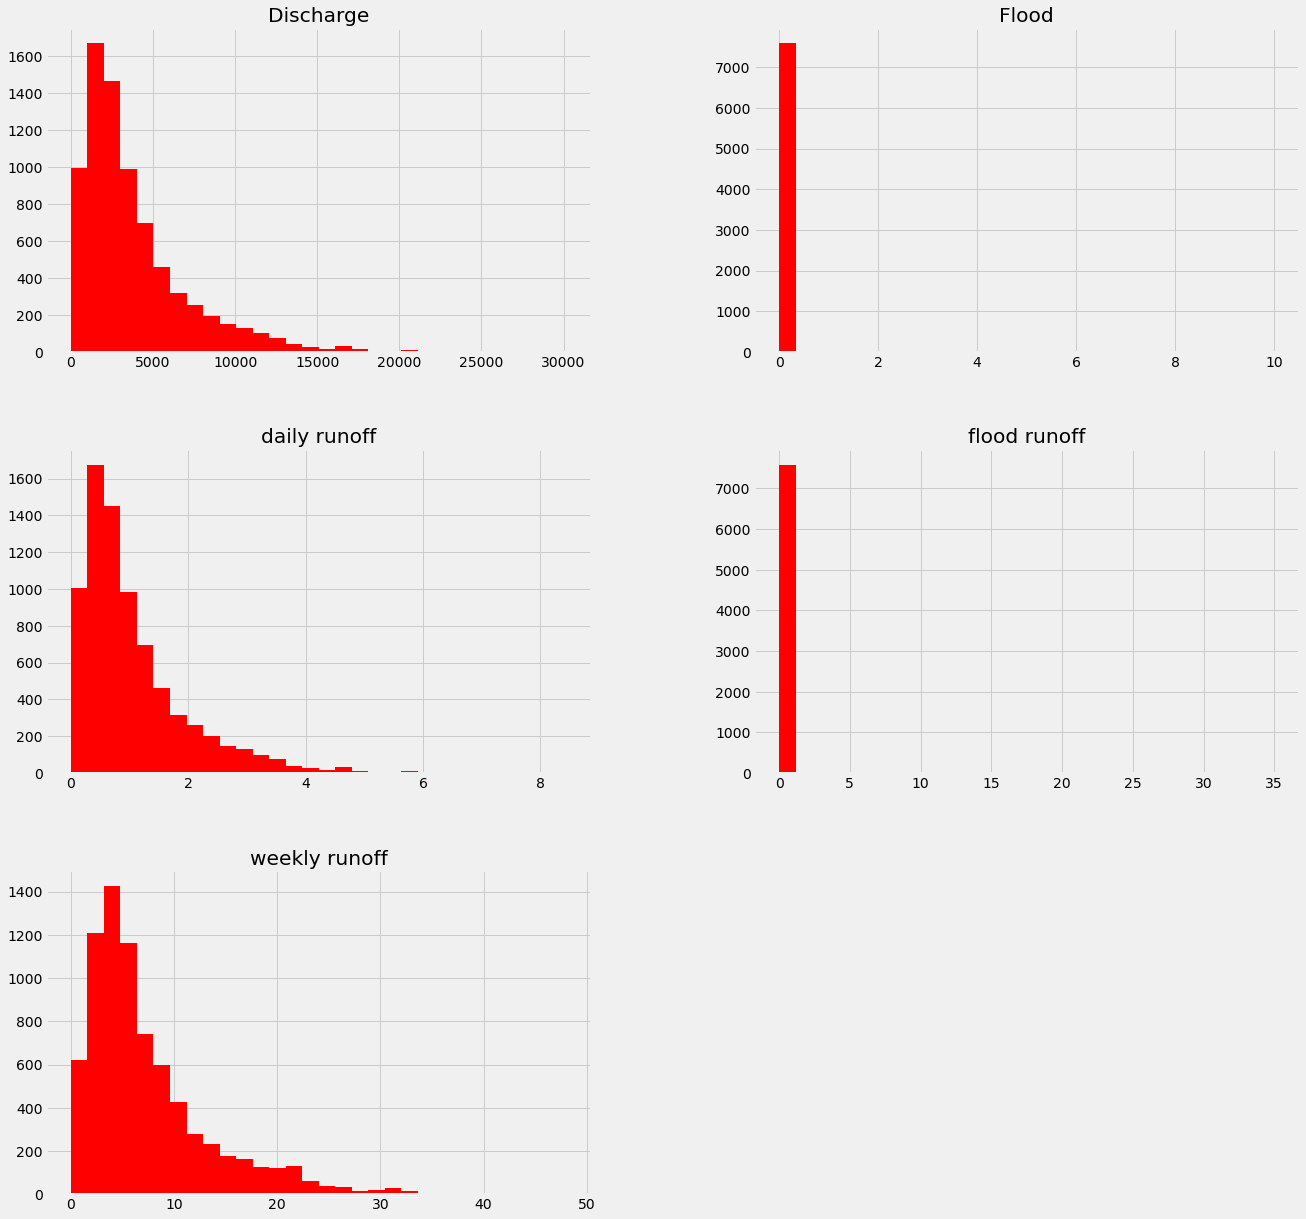

In [14]:
_ =data.hist(bins = 30, figsize=(20, 20), color='r')

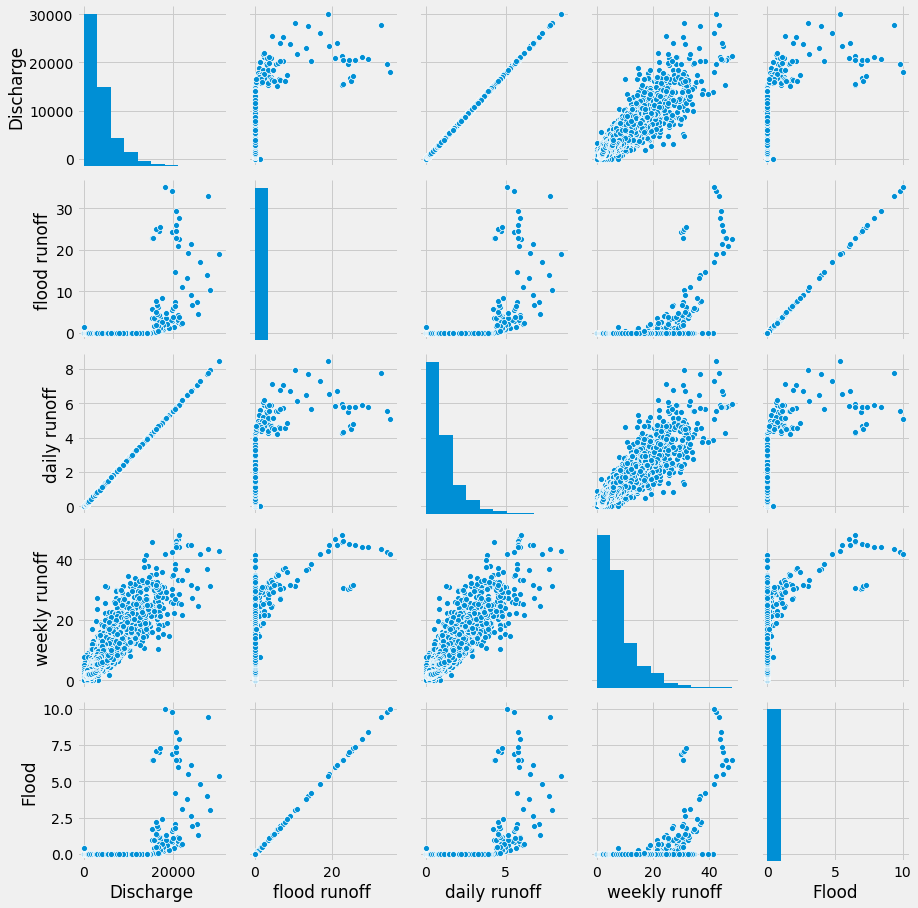

In [15]:
_ = sns.pairplot(data)

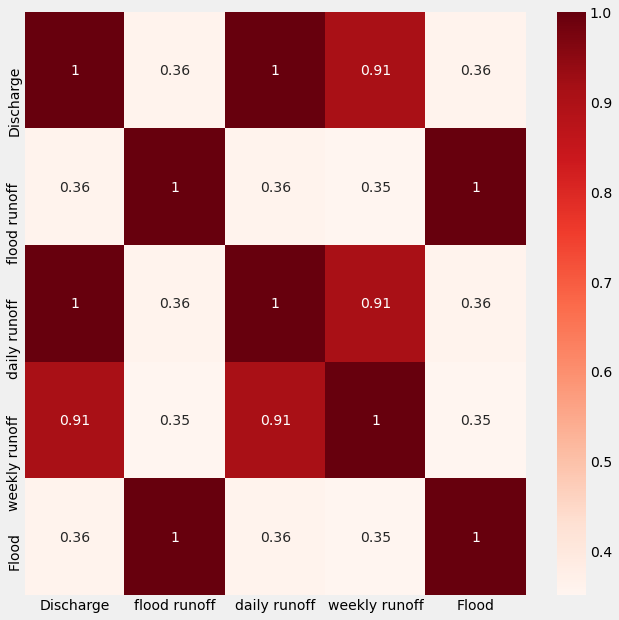

In [16]:
corr = data.corr()
mp.figure(figsize = (10, 10))
_ = sns.heatmap(corr, annot=True, cmap='Reds')

# OUTLIERS

Discharge


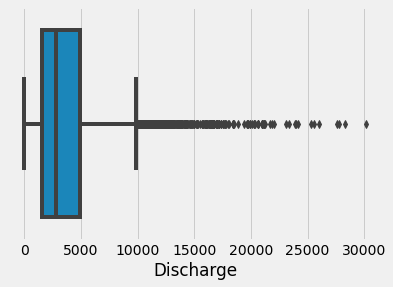

flood runoff


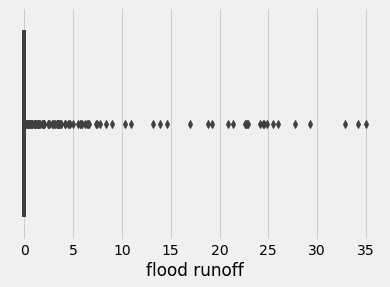

daily runoff


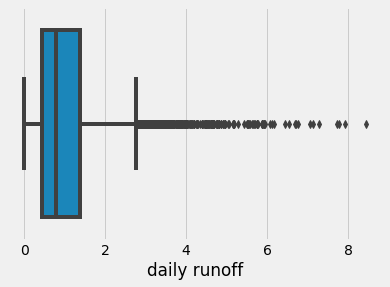

weekly runoff


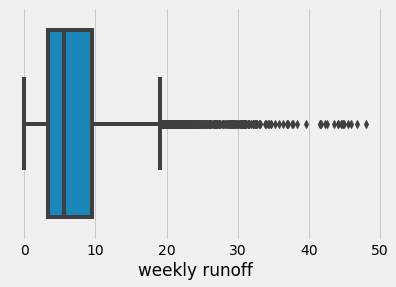

Flood


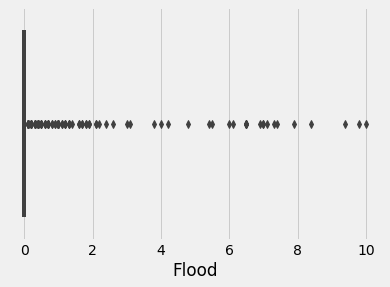

In [17]:
abc=list(data.columns.values)
for col in abc:
    sns.boxplot(data[col])
    print(col)
    mp.show()

In [18]:
from scipy import stats

In [19]:
Q1=data.quantile(0.25)
Q1

Discharge        1577.0000
flood runoff        0.0000
daily runoff        0.4400
weekly runoff       3.2825
Flood               0.0000
Name: 0.25, dtype: float64

In [20]:
Q3=data.quantile(0.75)
Q3

Discharge        4901.75
flood runoff        0.00
daily runoff        1.37
weekly runoff       9.58
Flood               0.00
Name: 0.75, dtype: float64

In [21]:
IQR=Q3-Q1
IQR

Discharge        3324.7500
flood runoff        0.0000
daily runoff        0.9300
weekly runoff       6.2975
Flood               0.0000
dtype: float64

In [22]:
flood_iqr_outlier=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
flood_iqr_outlier

,Discharge,flood runoff,daily runoff,weekly runoff,Flood
0,3244.0,0.0,0.91,0.00,0.0
1,1591.0,0.0,0.45,0.00,0.0
2,1973.0,0.0,0.55,0.00,0.0
3,1973.0,0.0,0.55,0.00,0.0
4,2011.0,0.0,0.56,0.00,0.0
...,...,...,...,...,...
7651,5312.0,0.0,1.49,8.34,0.0
7652,6079.0,0.0,1.70,9.17,0.0
7653,6079.0,0.0,1.70,10.05,0.0
7654,7385.0,0.0,2.07,11.14,0.0


# CREATE TRAINING AND TESTING DATASET

In [23]:
data.columns

Index(['Discharge', 'flood runoff', 'daily runoff', 'weekly runoff', 'Flood'], dtype='object')

In [24]:
x = flood_iqr_outlier.iloc[:,0:4]
x

,Discharge,flood runoff,daily runoff,weekly runoff
0,3244.0,0.0,0.91,0.00
1,1591.0,0.0,0.45,0.00
2,1973.0,0.0,0.55,0.00
3,1973.0,0.0,0.55,0.00
4,2011.0,0.0,0.56,0.00
...,...,...,...,...
7651,5312.0,0.0,1.49,8.34
7652,6079.0,0.0,1.70,9.17
7653,6079.0,0.0,1.70,10.05
7654,7385.0,0.0,2.07,11.14


In [25]:
y=flood_iqr_outlier.iloc[:,-1]
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7651    0.0
7652    0.0
7653    0.0
7654    0.0
7655    0.0
Name: Flood, Length: 7018, dtype: float64

In [26]:
x.shape

(7018, 4)

In [27]:
y.shape

(7018,)

In [28]:
x = np.array(x)
y = np.array(y).reshape(-1, 1)
y.shape

(7018, 1)

In [29]:
x

array([[3.244e+03, 0.000e+00, 9.100e-01, 0.000e+00],
       [1.591e+03, 0.000e+00, 4.500e-01, 0.000e+00],
       [1.973e+03, 0.000e+00, 5.500e-01, 0.000e+00],
       ...,
       [6.079e+03, 0.000e+00, 1.700e+00, 1.005e+01],
       [7.385e+03, 0.000e+00, 2.070e+00, 1.114e+01],
       [7.815e+03, 0.000e+00, 2.190e+00, 1.221e+01]])

In [30]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
x

array([[ 0.08817136,  0.        ,  0.09212932, -1.50711769],
       [-0.69367964,  0.        , -0.68553895, -1.50711769],
       [-0.5129978 ,  0.        , -0.51648063, -1.50711769],
       ...,
       [ 1.42909547,  0.        ,  1.42769004,  0.99545301],
       [ 2.04681924,  0.        ,  2.05320582,  1.2668761 ],
       [ 2.25020456,  0.        ,  2.25607581,  1.53331895]])

In [31]:
import joblib
joblib.dump(scaler_x,'transform')

['transform']

In [32]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [33]:
x_train

array([[ 1.81836551,  0.        ,  1.81652418,  1.65782495],
       [-1.4462053 ,  0.        , -1.44630139, -1.50711769],
       [-1.00537946,  0.        , -1.00674976, -1.02154427],
       ...,
       [ 0.76123485,  0.        ,  0.76836259,  0.54474127],
       [-0.48509144,  0.        , -0.48266897,  0.86098652],
       [ 0.69217844,  0.        ,  0.70073927,  0.7339904 ]])

In [34]:
y_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

# TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [35]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [36]:
joblib.dump(DT,"flood.save")

['flood.save']

In [37]:
accuracy_DT = DT.score(x_test, y_test)
accuracy_DT

1.0

In [38]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 200, max_depth = 10)
RF.fit(x_train, y_train)

<ipython-input-38-06e89c271be8>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=200)

In [39]:
accuracy_RF = RF.score(x_test, y_test)
accuracy_RF

1.0

# TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [41]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [42]:
y_pred=linreg.predict(x_test)
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [43]:
import pickle

In [44]:
pickle.dump(linreg,open('model.pkl','wb'))

In [45]:
y_pred=linreg.predict([[3244.0,0.0,0.9,0.01]])
y_pred[0][0]

0.0

In [46]:
y_test

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [47]:
accuracy_linreg = linreg.score(x_test, y_test)
accuracy_linreg

1.0

# COMPARING ALGORITHMS

Text(0, 0.5, 'Accuracy')

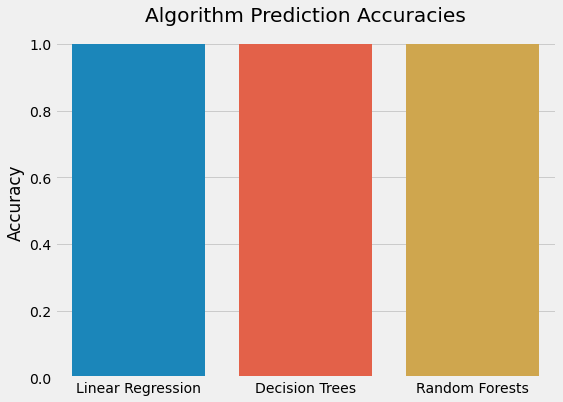

In [48]:
Methods = ['Linear Regression', 'Decision Trees', 'Random Forests']
Scores = np.array([accuracy_linreg, accuracy_DT, accuracy_RF])

fig, ax = mp.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
mp.title('Algorithm Prediction Accuracies')
mp.ylabel('Accuracy')